# Examples - Tutorials

In [1]:
import numpy as np
from time import perf_counter
from sympy import symbols, print_latex, MatrixSymbol

from sparkdatachallenge import (
    check_input, 
    generate_add_triu, 
    generate_mul_triu, 
    solution_brute1, 
    solution_brute2, 
    solution_math
)

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
x,y = symbols('x y')

## Generating latex

In [3]:
print_latex(x*y>=x+y)

x y \geq x + y


In [4]:
print_latex(y * (x-1) >= x)

y \left(x - 1\right) \geq x


In [5]:
print_latex(y >= x/(x-1))

y \geq \frac{x}{x - 1}


## Math

Some math:
\begin{align}
x y &\geq x + y \\
y \left(x - 1\right) &\geq x \\
y \begin{cases}
\geq \frac{x}{x - 1},\qquad x-1 > 0 \\
\leq \frac{x}{x - 1},\qquad x-1 < 0 \\
\end{cases}
\end{align}

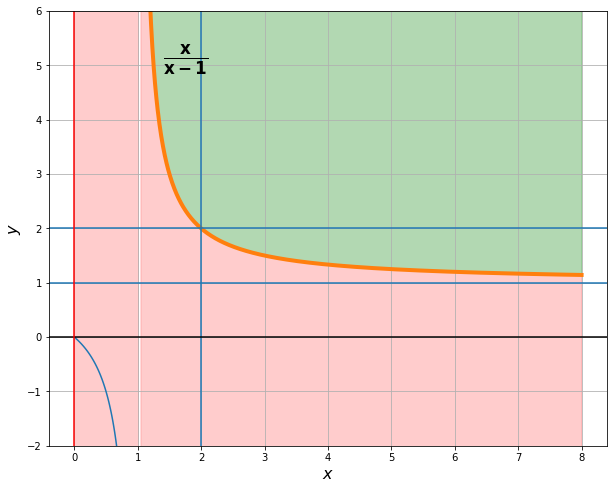

In [6]:
# coord
x0 = np.linspace(0,0.9,100)
x1 = np.linspace(1.05,8,1000)
x  = np.hstack([x0,x1])

fig = plt.figure(figsize=(10,8))
plt.plot(x0, x0 / (x0-1))
plt.plot(x1, x1 / (x1-1),linewidth=4)

ax = plt.gca()

ax.add_patch(Rectangle(xy=(0,-10),width=1,height=30, fill=True, alpha=.2, color='red'))
# ax.add_patch(Rectangle(xy=(2,-10),width=6,height=30, fill=True, alpha=.2, color='green'))
plt.fill_between(x1,x1/(x1-1),20,color='green',alpha=.3)
plt.fill_between(x1,x1/(x1-1),-20,color='red',alpha=.2)
ax.axhline(2)
ax.axvline(2)
ax.axhline(1)
ax.axhline(0, c='black')
ax.axvline(0,c='red')
plt.xlabel(r"$x$",fontsize=16)
plt.ylabel(r"$y$",fontsize=16)
ax.text(1.4,5,r"$\mathbf{\frac{x}{x-1}}$",fontsize=24,c='black')
plt.ylim(-2,6)
plt.grid()
plt.show()

The plot above shows the possibilities, except for the zero combinations (case 1).

**Cases:**

1. $x=0 \Rightarrow y=0$ number of pairs : $\frac{n(n-1)}{2}$
2. $0<x<1 \Rightarrow$ no solution
3. $x=1 \overset{\text{eq.2}}{\Longrightarrow}   y*0 >=1 \Rightarrow$ no solution
4. $1<x<2 \Rightarrow y >= \frac{x}{x-1}$ 
5. $x=2 \Rightarrow y >=2$
6. $x>=2 \Rightarrow y >= x/(x-1) \Rightarrow y >=2$ using non-decreasing sorted list all pairs are multiplicative => number of pairs is $\frac{n(n-1)}{2}$

## Simple test 1

In [7]:
A = np.array([0, 1, 2 , 2, 3, 5])
B = np.array([500_000,500_000,0,0,0,20_000])

In [8]:
solution_brute1(A,B, verbose=True)

[(1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


8

In [9]:
solution_brute2(A,B, verbose=True)

[(1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


8

In [10]:
solution_math(A,B)

8

## Simple test 2

In [11]:
A = np.hstack([np.array([0]),A])
B = np.hstack([np.array([0]),B])

In [12]:
solution_brute1(A,B, verbose=True)

[(2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


8

In [13]:
solution_brute2(A,B, verbose=True)

[(2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


8

In [14]:
solution_math(A,B)

8

In [15]:
A = np.hstack([np.array([0]),A])
B = np.hstack([np.array([0]),B])

In [16]:
solution_brute1(A,B, verbose=True)

[(0, 1), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]


9

In [17]:
solution_brute2(A,B, verbose=True)

[(0, 1), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]


9

In [18]:
solution_math(A,B)

9

## Performance test

In [19]:
for p in range(0,6):
    tic = perf_counter()
    A=np.array([1,3]*int(10**p / 2))
    B=np.array([500_000,0]*int(10**p / 2))
    print(solution_math(A,B))
    print("Pow {} took {}s".format(p, perf_counter()-tic))

0
Pow 0 took 0.00038270799996098503s
35
Pow 1 took 0.00020273799964343198s
3725
Pow 2 took 0.00027315799889038317s
374750
Pow 3 took 0.003733669000212103s
37497500
Pow 4 took 0.0626539730001241s
1000000000
Pow 5 took 4.6713024560012855s
